# Visualizations for Saturation and Network Insights

This notebook produces visual summaries that help interpret the saturation index and the network structures across Chicago Community Areas. It includes a choropleth map of saturation, scatter plots that relate saturation to demographic indicators, and simple layouts of the spatial adjacency and similarity networks. These visualizations support the final interpretation and communication of results.


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import pickle


In [2]:
# -----------------------------------------------------------
# 1. Load data
# -----------------------------------------------------------

df = pd.read_csv("saturation_index_by_CA.csv")
df["ca_name"] = df["ca_name"].str.upper().str.strip()

# Load CA boundaries
ca_url = "https://data.cityofchicago.org/resource/igwz-8jzy.geojson"
ca = gpd.read_file(ca_url).to_crs("EPSG:4326")
ca = ca.rename(columns={"area_numbe": "ca_num", "community": "ca_name"})
ca["ca_num"] = ca["ca_num"].astype(int)
ca["ca_name"] = ca["ca_name"].str.upper().str.strip()

# Merge
gdf = ca.merge(df, on=["ca_num", "ca_name"], how="left")

<Figure size 1200x1000 with 0 Axes>

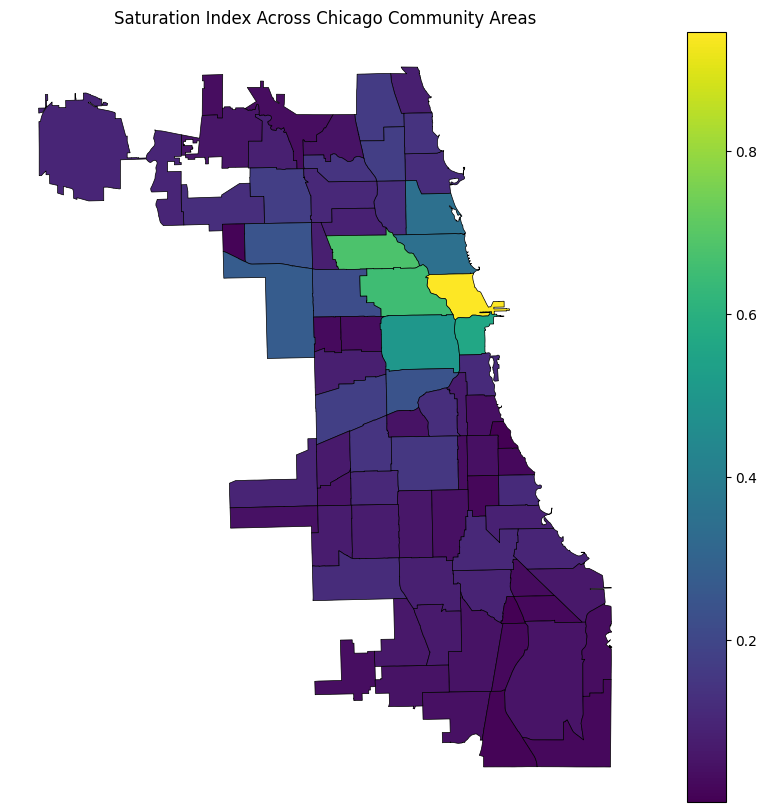

In [3]:
# -----------------------------------------------------------
# 2. Choropleth Map of Saturation Index
# -----------------------------------------------------------

plt.figure(figsize=(12, 10))
gdf.plot(
    column="saturation_index",
    cmap="viridis",
    legend=True,
    figsize=(12, 10),
    edgecolor="black",
    linewidth=0.5
)
plt.title("Saturation Index Across Chicago Community Areas")
plt.axis("off")
plt.show()

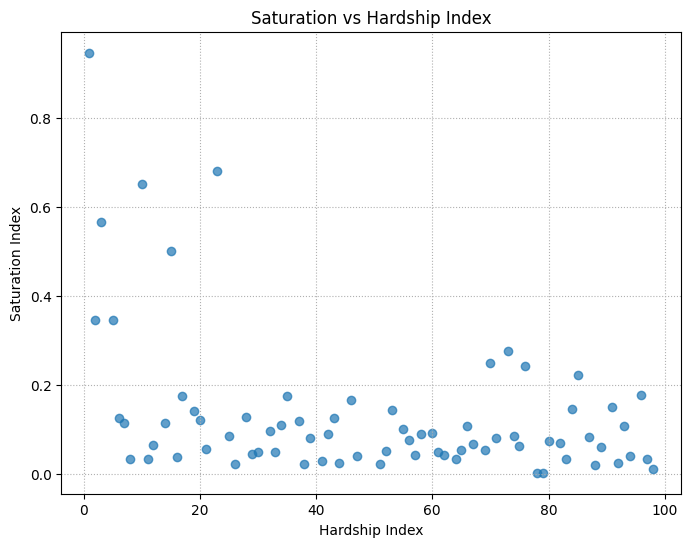

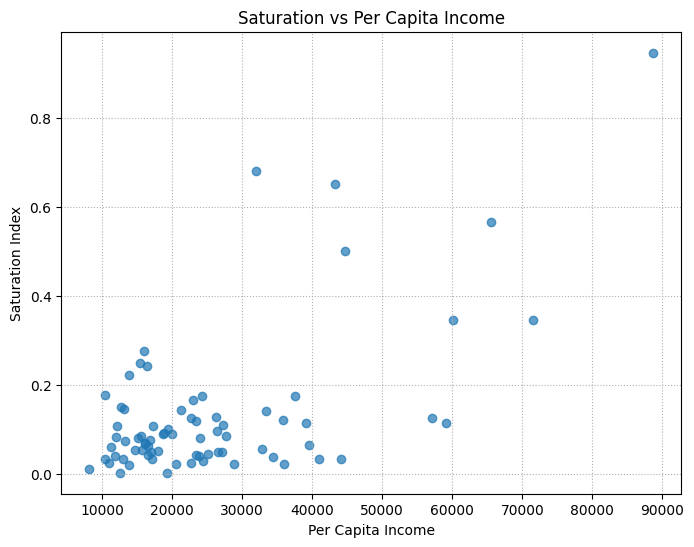

In [4]:

# -----------------------------------------------------------
# 3. Scatter Plots
# -----------------------------------------------------------

# Scatter: Saturation vs Hardship Index
plt.figure(figsize=(8, 6))
plt.scatter(df["hardship_index"], df["saturation_index"], alpha=0.7)
plt.xlabel("Hardship Index")
plt.ylabel("Saturation Index")
plt.title("Saturation vs Hardship Index")
plt.grid(True, linestyle=":")
plt.show()

# Scatter: Saturation vs Per Capita Income
plt.figure(figsize=(8, 6))
plt.scatter(df["per_capita_income"], df["saturation_index"], alpha=0.7)
plt.xlabel("Per Capita Income")
plt.ylabel("Saturation Index")
plt.title("Saturation vs Per Capita Income")
plt.grid(True, linestyle=":")
plt.show()


In [ ]:
# -----------------------------------------------------------
# 4. Load Networks for Visualization
# -----------------------------------------------------------

with open("../datasets/adjacency_network.gpickle", "rb") as f:
    G_adj = pickle.load(f)

with open("../datasets/similarity_network.gpickle", "rb") as f:
    G_sim = pickle.load(f)


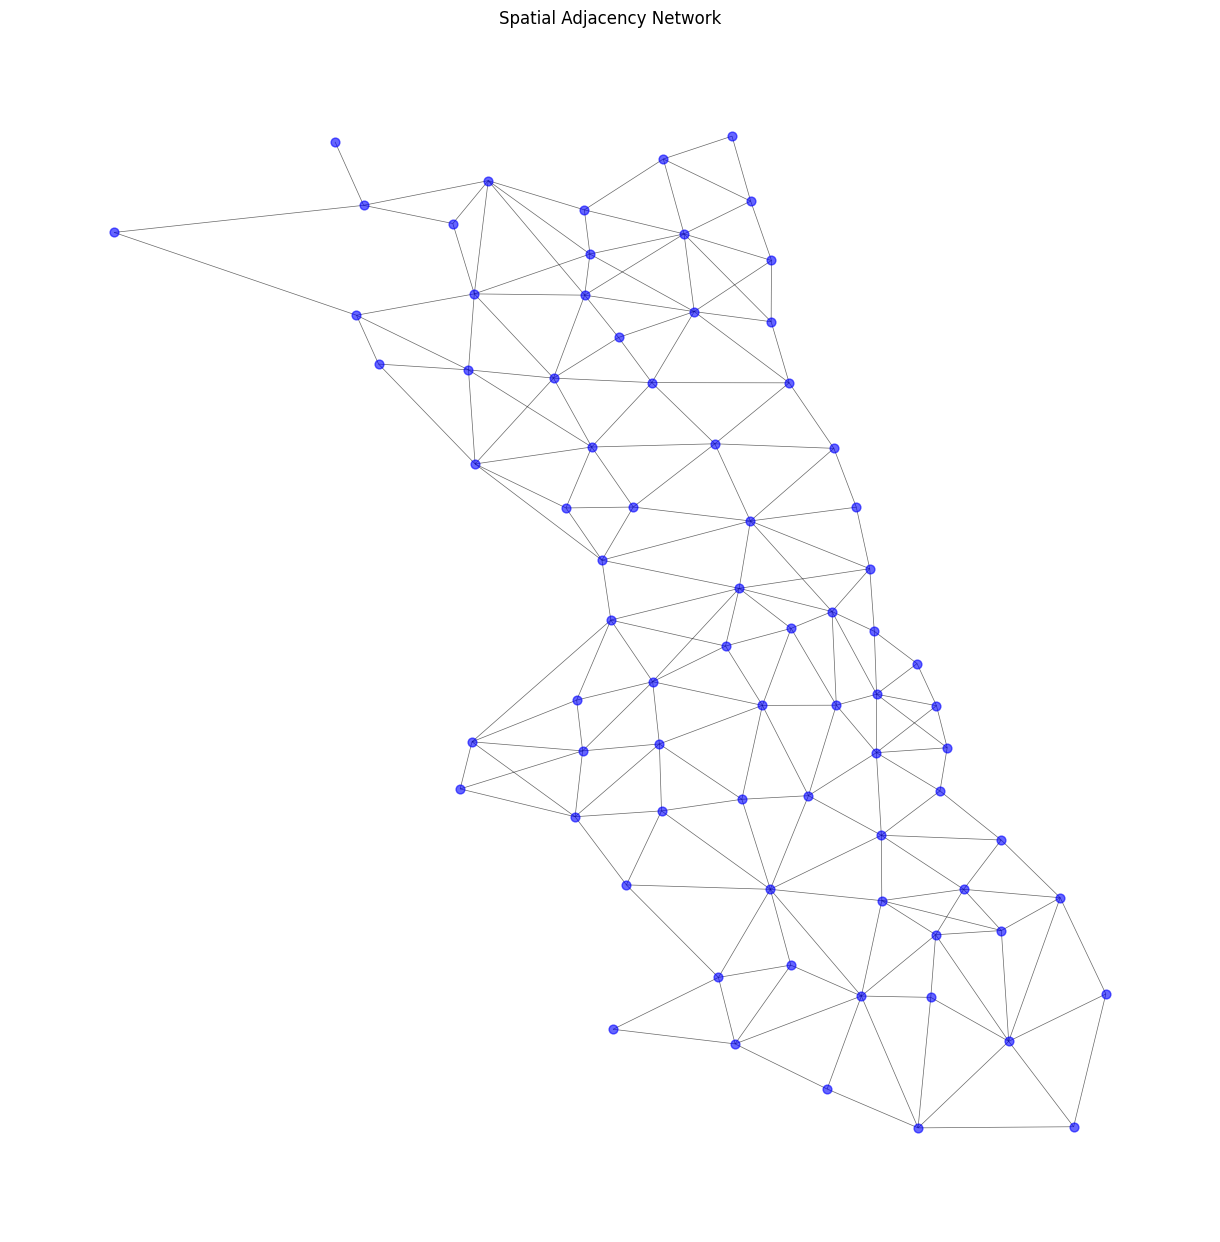

In [6]:

# -----------------------------------------------------------
# 5. Simple Layout Plot, Spatial Adjacency Network
# -----------------------------------------------------------

# Build a dictionary of positions from geographic centroids
pos = {}
for _, row in gdf.iterrows():
    centroid = row.geometry.centroid
    pos[row["ca_num"]] = (centroid.x, centroid.y)

plt.figure(figsize=(12, 12))
nx.draw(
    G_adj,
    pos=pos,
    node_size=40,
    node_color="blue",
    alpha=0.6,
    with_labels=False,
    width=0.5
)
plt.title("Spatial Adjacency Network")
plt.show()

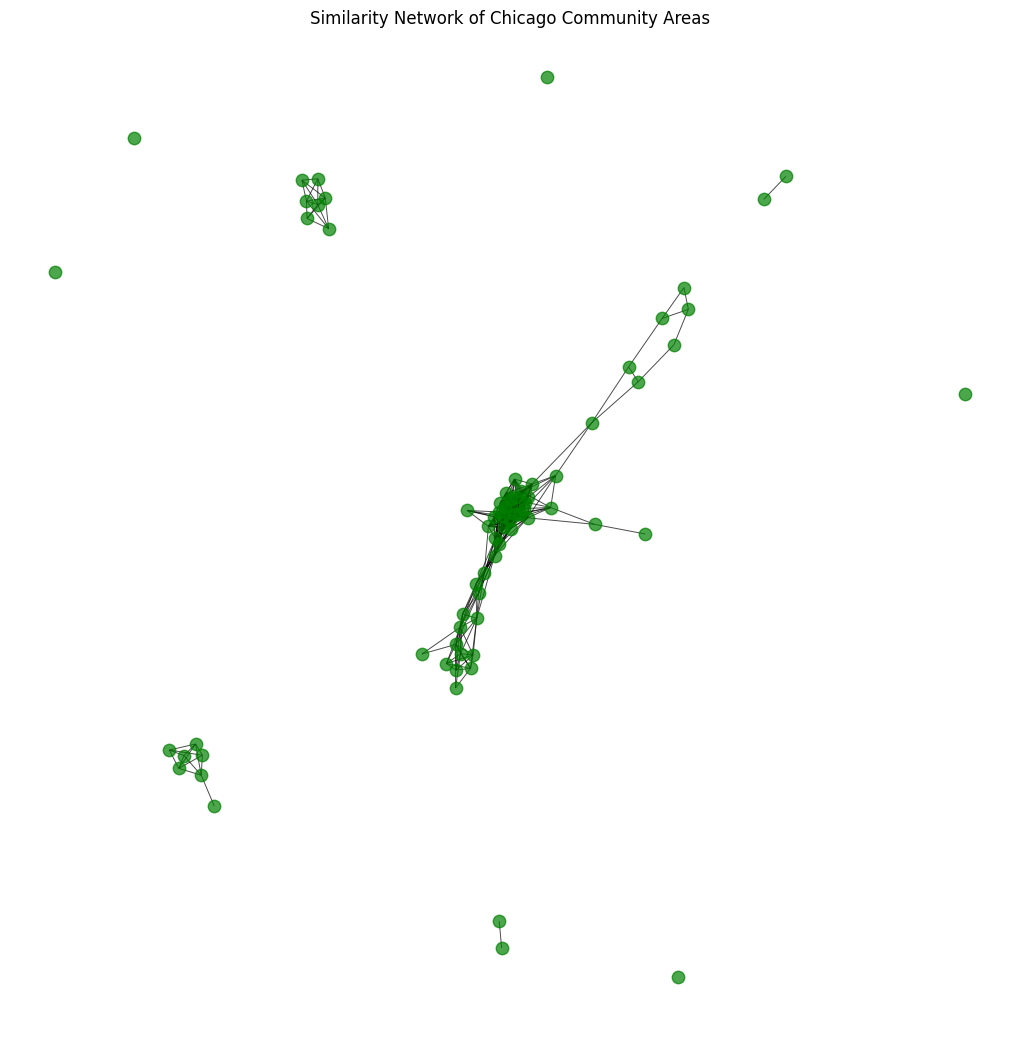

In [7]:
# -----------------------------------------------------------
# 6. Similarity Network Layout
# -----------------------------------------------------------

plt.figure(figsize=(10, 10))
layout_sim = nx.spring_layout(G_sim, seed=42)

nx.draw(
    G_sim,
    pos=layout_sim,
    node_size=80,
    node_color="green",
    alpha=0.7,
    with_labels=False,
    width=0.7
)

plt.title("Similarity Network of Chicago Community Areas")
plt.show()
